# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [2]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy.stats as st
%matplotlib inline
plt.style.use("seaborn-v0_8-talk")
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3
plt.rcParams["axes.edgecolor"] = "0.3"
plt.rcParams["axes.linewidth"] = 0.8
from statsmodels.tsa.stattools import adfuller

In [22]:
tickers=["AAPL","MSFT","GOOG","AMZN","TSLA","NVDA"]
data_long=yf.download(tickers,start="2015-01-01", end="2024-01-01",auto_adjust=False)
data_med=yf.download(tickers,start="2020-01-01",end="2024-01-01",auto_adjust=False)
df_long=data_long['Adj Close'].ffill().bfill()
df_long.describe()

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000
mean,81.394710,91.950540,73.063479,154.516907,11.101311,102.886245
std,55.990880,48.654536,36.298158,99.658478,11.961935,110.936400
min,20.604086,14.347500,24.377235,34.437168,0.459257,9.578000
25%,32.814696,44.303625,41.515255,59.182487,2.668012,16.670500
50%,51.220850,90.691998,59.376661,127.528786,5.962060,23.160666
75%,139.017647,133.230000,104.133982,244.037373,15.909115,214.290005
max,196.256577,186.570496,149.587067,377.077820,50.376503,409.970001


## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

In [4]:
asset='MSFT'
prices=data_med['Adj Close'].ffill().bfill()

In [ ]:
ret_1=prices[asset].pct_change().dropna()
ret_5=prices[asset].pct_change(periods=5).dropna()
ret_20=prices[asset].pct_change(periods=20).dropna()

In [6]:
log_ret_1=np.log(prices[asset]).diff().dropna()
log_ret_5=np.log(prices[asset]).diff(5).dropna()
log_ret_20=np.log(prices[asset]).diff(20).dropna()

In [7]:
roll_vol_5=log_ret_1.rolling(5).std().dropna()
roll_vol_20=log_ret_1.rolling(20).std().dropna()
roll_vol_60=log_ret_1.rolling(60).std().dropna()

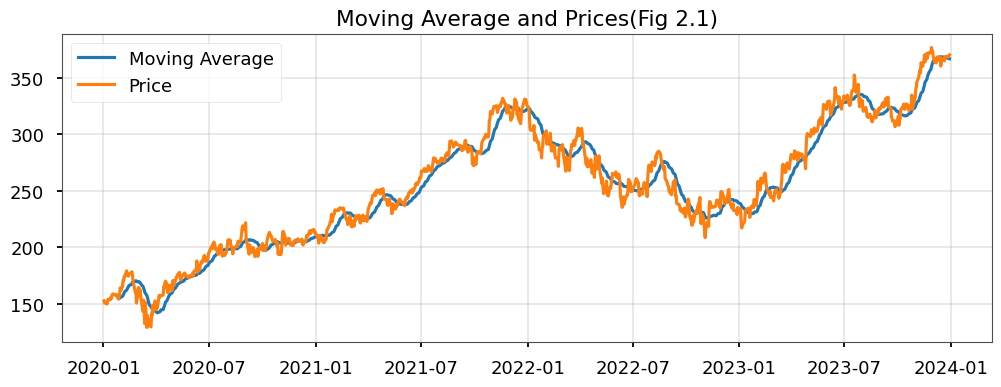

In [26]:
ma_20=prices[asset].rolling(20).mean().dropna()
plt.plot(ma_20,label='Moving Average')
plt.plot(prices[asset].dropna(),label='Price')
plt.title('Moving Average and Prices(Fig 2.1)')
plt.legend()

Text(0.5, 1.0, 'Log returns(Fig 2.2)')

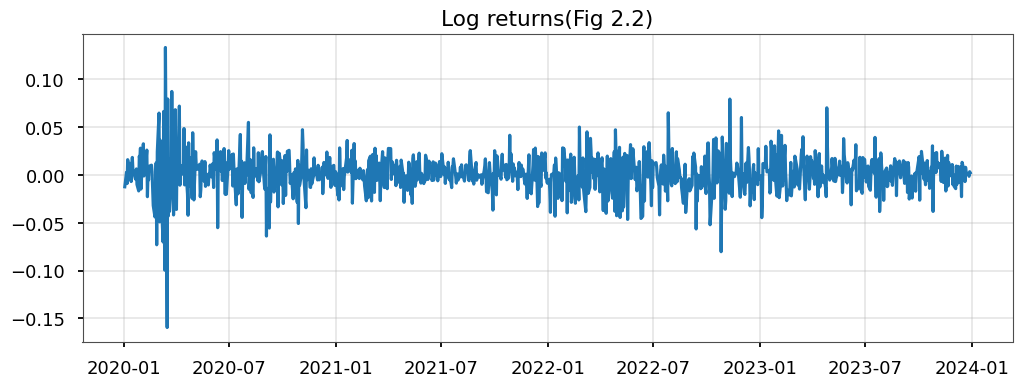

In [27]:
plt.plot(log_ret_1)
plt.title('Log returns(Fig 2.2)')

Text(0.5, 1.0, 'Rolling Volatility (Fig 2.3)')

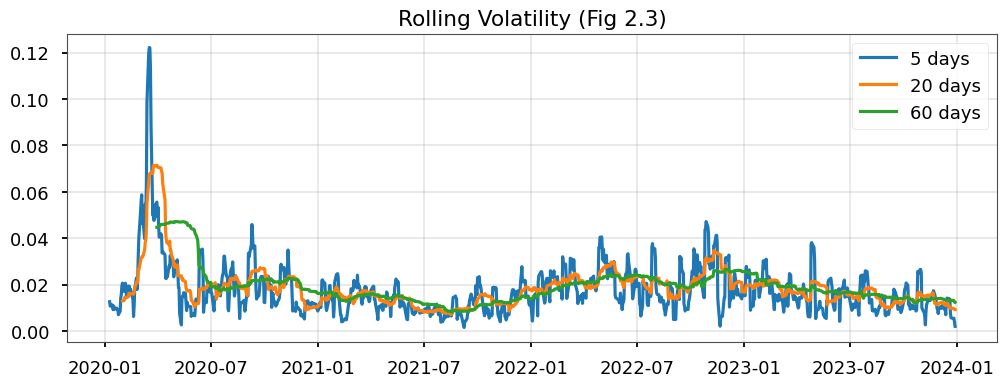

In [29]:
plt.plot(roll_vol_5,label='5 days')
plt.plot(roll_vol_20,label='20 days')
plt.plot(roll_vol_60,label='60 days')
plt.legend()
plt.title('Rolling Volatility (Fig 2.3)')

Text(0.5, 1.0, '|Daily Return| vs Volume')

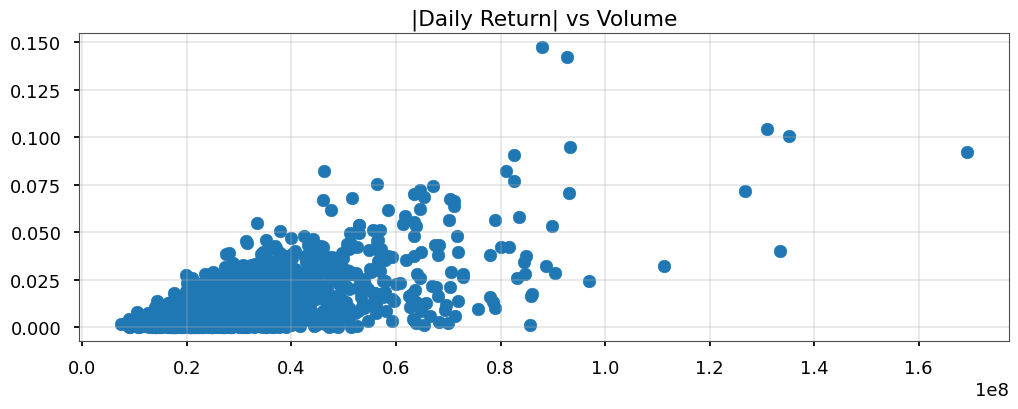

In [ ]:
daily_price=data_long['Adj Close'][asset].ffill().bfill()
volume=data_long['Volume'][asset]
daily_price_chng=np.abs(daily_price.pct_change().dropna())
plt.scatter(volume.loc[daily_price_chng.index],daily_price_chng)
plt.title('|Daily Return| vs Volume (Fig - 2.4)')

Text(0.5, 1.0, 'Grouping returns and volatility by months(Fig - 2.5)')

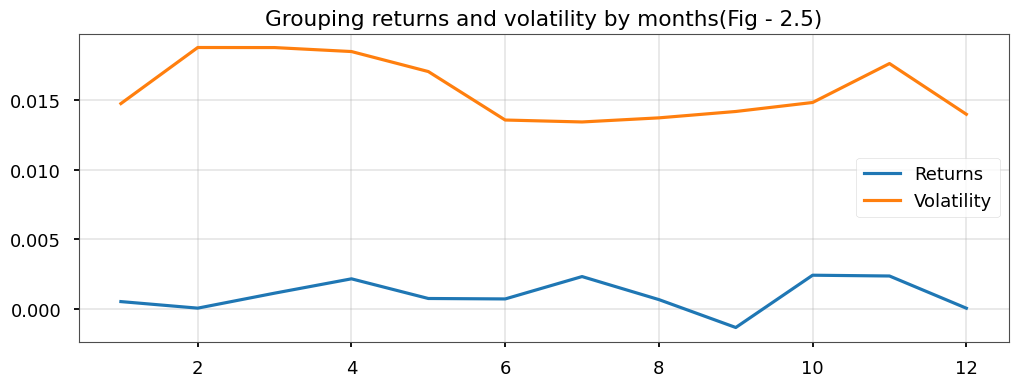

In [41]:
log_ret_1_long=np.log(daily_price).diff().dropna()
mon_ret=log_ret_1_long.groupby(log_ret_1_long.index.month).mean()
roll_vol_20_long=log_ret_1_long.rolling(20).std().dropna()
mon_volta=roll_vol_20_long.groupby(roll_vol_20_long.index.month).mean()
plt.plot(mon_ret,label='Returns')
plt.plot(mon_volta,label='Volatility')
plt.legend()
plt.title('Grouping returns and volatility by months(Fig - 2.5)')

#### Observations:
* Fig 2.1 - Prices are generally very close to moving average at that point(20 days).
* Fig 2.2 - The log returns are around 0 but it spikes whenever there is a huge fluctuation.
* Fig 2.3 - The Volatilities are stable most of the time which is generally near 0 but it spikes whenever there is some fluctations in this case we can see a spike in covid crash around feb to mar 2020.So,High volatility correlate with price drops.
* Fig 2.4 - Absolute price variations are high on high trade volume days,but on small trade volume days, the gain/loss is small.
* Fig 2.5 - We see that slightly higher average volatility in certain months (e.g., Feb–Apr).However,the pattern is not strong or consistent,suggesting no clear seasonality.

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

In [12]:
data_3=data_long['Adj Close'].ffill().bfill()
logreturn_long=np.log(data_3[asset]).diff().dropna()


In [13]:
log_mean_20=logreturn_long.rolling(20).mean().dropna()
log_mean_60=logreturn_long.rolling(60).mean().dropna()
log_mean_120=logreturn_long.rolling(120).mean().dropna()

In [14]:
log_std_20=logreturn_long.rolling(20).std().dropna()
log_std_60=logreturn_long.rolling(60).std().dropna()
log_std_120=logreturn_long.rolling(120).std().dropna()

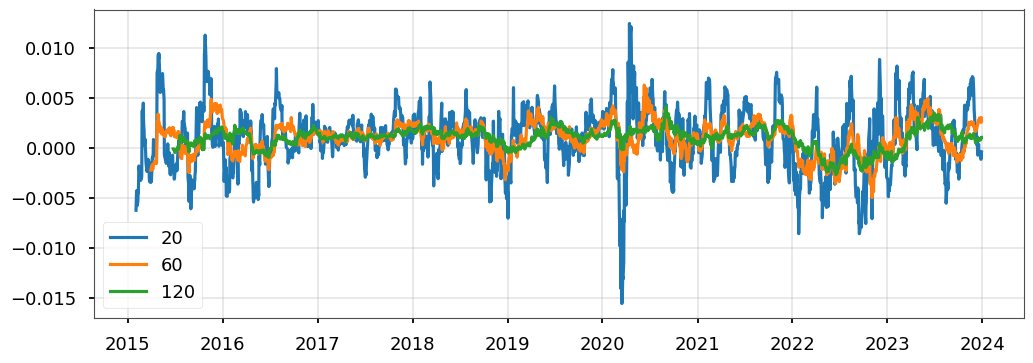

In [15]:
plt.plot(log_mean_20,label='20')
plt.plot(log_mean_60,label='60')
plt.plot(log_mean_120,label='120')
plt.legend()

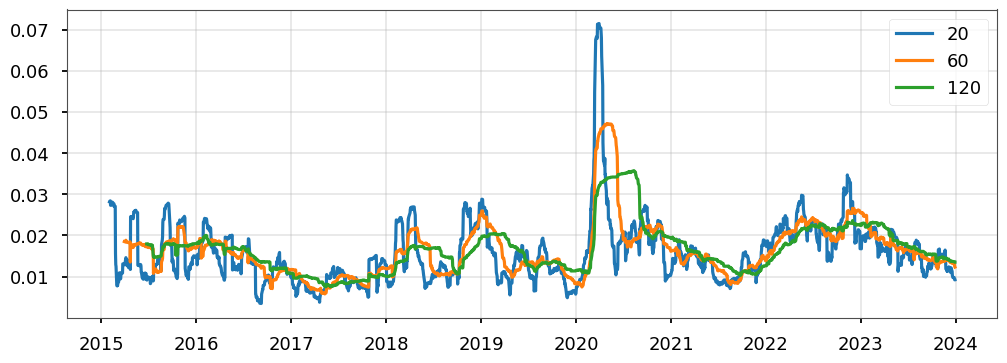

In [16]:
plt.plot(log_std_20,label='20')
plt.plot(log_std_60,label='60')
plt.plot(log_std_120,label='120')
plt.legend()

In [17]:
#ADF
adf=adfuller(logreturn_long)
p=adf[1]
if(p<0.05):
    print("H0 rejected")

H0 rejected


* The Rolling Mean of log returns fluctuates around 0 with no persistant upward or downward trend.So Mean of log returns is approximately stationary. 
* But the rolling std shows significant spikes during various parts it is clearly visible in the time of covid crash.So variance of log returns is not constant.

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

[*********************100%***********************]  1 of 1 completed

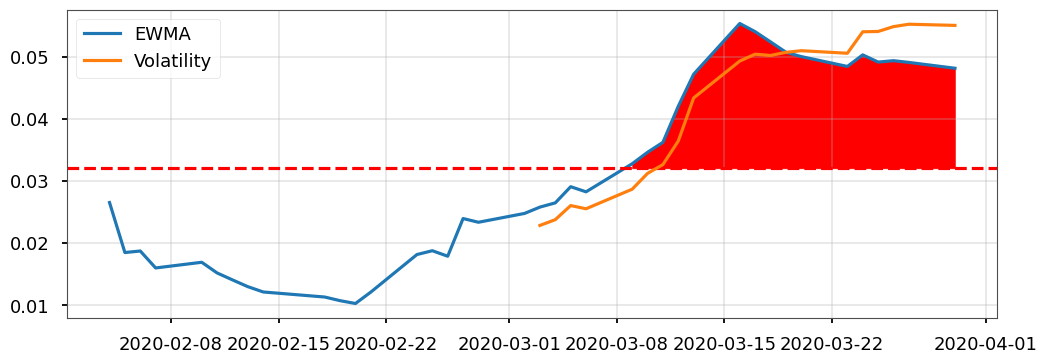

In [43]:
tickers_crash=["GOOG"]
data_crash=yf.download(tickers=tickers_crash,start="2020-02-01",end="2020-03-31",auto_adjust=False)
df_crash=data_crash['Adj Close']['GOOG'].ffill().bfill()
log_crash=np.log(df_crash).diff().dropna()
roll_vol_20_crash=log_crash.rolling(20).std().dropna()
EWMA=log_crash.pow(2).ewm(alpha=0.06).mean().pow(0.5)
EWMA_60=EWMA.quantile(0.6)
plt.plot(EWMA,label='EWMA')
plt.axhline(EWMA_60,color='red',linestyle='--')
plt.fill_between(EWMA.index,EWMA,EWMA_60,where=(EWMA>EWMA_60),color='red')
plt.plot(roll_vol_20_crash,label='Volatility')
plt.legend()

Var of z: 1.4295632601126065


(array([2., 1., 2., 0., 2., 0., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2.,
        2., 1., 4., 1., 2., 0., 1., 2., 1., 1., 2., 0., 1.]),
 array([-2.40974029, -2.26590168, -2.12206308, -1.97822447, -1.83438587,
        -1.69054727, -1.54670866, -1.40287006, -1.25903145, -1.11519285,
        -0.97135424, -0.82751564, -0.68367703, -0.53983843, -0.39599983,
        -0.25216122, -0.10832262,  0.03551599,  0.17935459,  0.3231932 ,
         0.4670318 ,  0.61087041,  0.75470901,  0.89854761,  1.04238622,
         1.18622482,  1.33006343,  1.47390203,  1.61774064,  1.76157924,
         1.90541785]),
 <BarContainer object of 30 artists>)

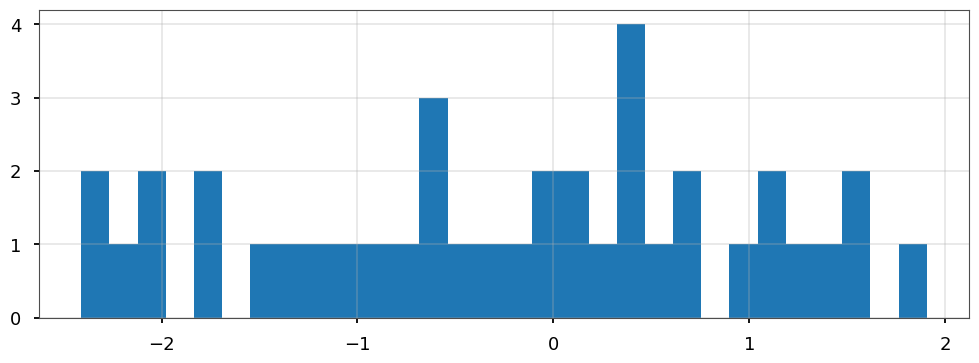

In [45]:
z=log_crash/EWMA
print("Var of z:",z.var())
plt.hist(z,bins=30)


* **Analysis:**
    * Which is smoother? - Volatility
    * Which estimator reacts faster to the sudden crash in March 2020? - EWMA
    * Which one would you prefer for risk management? - EWMA 

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

Day, skew: -0.16323804142192 Kurtosis: 4.504614304261735
Week, skew: 0.07790521343973623 Kurtosis: 1.3051346121237115
Month, skew: 0.39411101875202176 Kurtosis: 0.6034609743704444


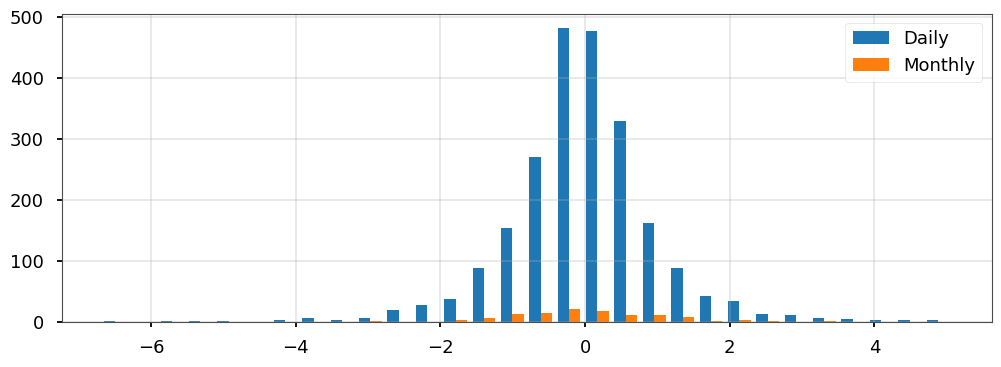

In [19]:
df_5=data_long['Adj Close']['TSLA'].ffill().bfill()
df_5_week=df_5.resample('W').last()
df_5_month=df_5.resample('ME').last()
log_day=np.log(df_5).diff().dropna()
log_month=np.log(df_5_month).diff().dropna()
log_week=np.log(df_5_week).diff().dropna()
print("Day, skew:",st.skew(log_day),"Kurtosis:",st.kurtosis(log_day))
print("Week, skew:",st.skew(log_week),"Kurtosis:",st.kurtosis(log_week))
print("Month, skew:",st.skew(log_month),"Kurtosis:",st.kurtosis(log_month))
day_mean=log_day.mean()
day_std=log_day.std()
month_mean=log_month.mean()
month_std=log_month.std()
log_day_stdized=(log_day-day_mean)/day_std
log_month_stdize=(log_month-month_mean)/month_std
plt.hist([log_day_stdized, log_month_stdize], bins=30, label=['Daily','Monthly'])
plt.legend()


#### Observations
* Kurtosis decreases as time horizon increases
* Daily returns exhibit fatter tails
* Central Limit Theorem

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [20]:
to=pd.Timestamp.today().normalize()         
tom=to+pd.Timedelta(days=1)   
data_invest=yf.download("NVDA",start="2007-06-05",end=tom.strftime("%Y-%m-%d"),auto_adjust=False)
c=data_invest.loc["2007-06-07","Open"]
c_new=data_invest["Close"]["NVDA"].iloc[-1]
tot=((1000/c)*(c_new))//1600
print(tot)

[*********************100%***********************]  1 of 1 completed

Ticker
NVDA    181.0
Name: 2007-06-07 00:00:00, dtype: float64
